![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

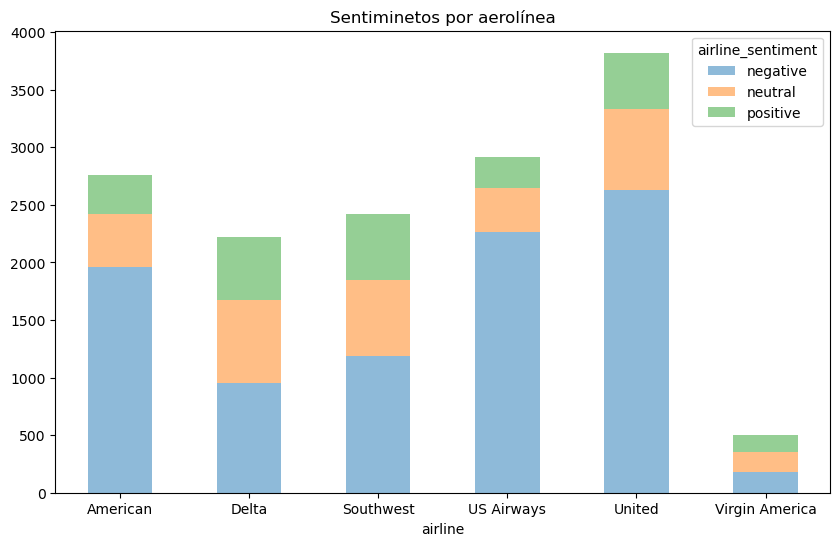

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
vect = CountVectorizer()
X_dtm_train = vect.fit_transform(X_train)
X_dtm_test = vect.transform(X_test)

In [12]:
clf = RandomForestClassifier()

In [13]:
clf.fit(X_dtm_train, y_train)

RandomForestClassifier()

In [14]:
pd.Series(cross_val_score(clf, X_dtm_test, y_test, cv=10, scoring='accuracy')).describe()

count    10.000000
mean      0.752275
std       0.009394
min       0.737060
25%       0.748839
50%       0.753623
75%       0.755176
max       0.768116
dtype: float64

In [15]:
acc_1 = pd.Series(cross_val_score(clf, X_dtm_test, y_test, cv=10, scoring='accuracy')).mean()
acc_1

0.747103160344267

**El modelo ha tenido un accuracy de 0.747, lo que significa que ha podido clasificar correctamente el 74,7% de los registros del conjunto de validación usando únicamente la función CountVectorizer**

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 2
vect = CountVectorizer(stop_words='english')
X_dtm_train = vect.fit_transform(X_train)
X_dtm_test = vect.transform(X_test)

In [17]:
clf = RandomForestClassifier()
clf.fit(X_dtm_train, y_train)

RandomForestClassifier()

In [18]:
acc_2 = pd.Series(cross_val_score(clf, X_dtm_test, y_test, cv=10, scoring='accuracy')).mean()
acc_2

0.7382056020395942

**El modelo ha tenido un accuracy de 0.738, lo que significa que ha podido clasificar correctamente el 73.8% de los registros del conjunto de validación. Esto nos diría que, para este base de datos en particular, los stopwords parecen tener cierta importancia para este modelo.**

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
vect = CountVectorizer()
X_dtm_train = vect.fit_transform(X_train)
X_dtm_test = vect.transform(X_test)

In [20]:
# Celda 3
wordnet_lemmatizer = WordNetLemmatizer()
import nltk

In [28]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AABELVEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AABELVEL\AppData\Roaming\nltk_data...


True

In [29]:
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

def tokenize_test(vect):
    X_dtm_train = vect.fit_transform(X_train)
    X_dtm_test = vect.transform(X_test)
    clf = RandomForestClassifier()
    return pd.Series(cross_val_score(clf, X_dtm_test, y_test, cv=10)).mean()

In [30]:
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)

In [31]:
acc_3 = tokenize_test(vect_lemas)

In [32]:
acc_3

0.7398567835326729

**El modelo con lematización del texto con verbos ha tenido un accuracy de 0.7399, lo que significa que ha podido clasificar correctamente el 73.99% de los registros del conjunto de validación, siendo menor que el modelo que el primer modelo (count vectorizer sin eliminar stopwords) pero mejor que el segundo modelo (count vectorizer con eliminación stopwords).**

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [34]:
# Celda 4
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

def tokenize_test(vect):
    X_dtm_train = vect.fit_transform(X_train)
    X_dtm_test = vect.transform(X_test)
    clf = RandomForestClassifier()
    return pd.Series(cross_val_score(clf, X_dtm_test, y_test, cv=10)).mean()

# Aplicamos CountVetorizer al modelo. 

vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
vect_final = CountVectorizer(analyzer=split_into_lemmas, stop_words='english')
acc_4 = tokenize_test(vect_final)

In [35]:
acc_4

0.7402755676471091

**El modelo ha tenido un accuracy de 0.74, lo que significa que ha podido clasificar correctamente el 74,02% de los registros del conjunto de validación.**

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

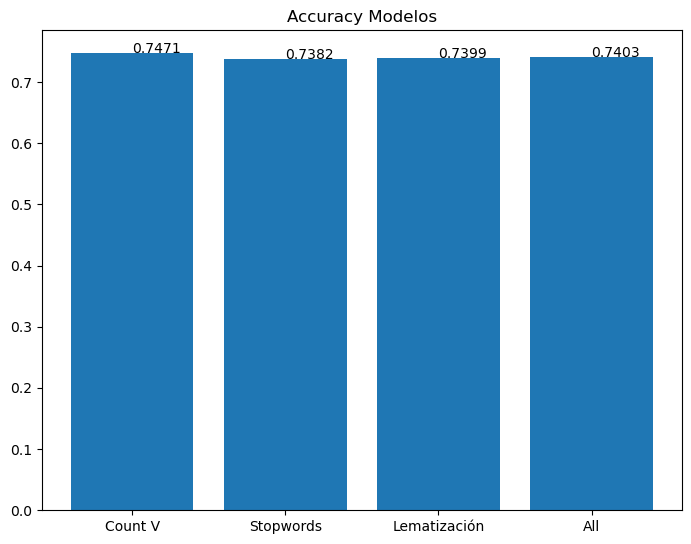

In [37]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy Modelos")
ejeX = ['Count V', 'Stopwords','Lematización','All']
ejeY = [round(acc_1,4),round(acc_2,4),round(acc_3,4),round(acc_4,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Se evidencia que el mejor modelo es el dado con el Count Vectorizer sin eliminar la eliminación de stopwords, seguido por el modelo en donde se aplica Count Vectorizer con la lematización de verbos y eliminando las stopwords. La diferencia entre estos dos es de 0.7%, lo que significa que el primer modelo pudo clasificar de forma correcta un 0.7% más de los registros del conjunto de validación. 

Este resultado nos dice que la eliminación de stopwords y la lematización de los verbos pueden no haber mejorado el rendimiento del modelo. Esto puede ser porque las stopwords no son siempre irrelevantes en la clasificación de sentimientos y la lematización de los verbos puede no haber sido suficiente para capturar la toxicidad de los comentarios.

**Ventajas:**
- Las ventajas del modelo que utilizó solo el CountVectorizer es que es una técnica simple y efectiva para convertir el texto en una representación numérica. Al no eliminar las stopwords y no realizar la lematización de los verbos, es más probable que se mantenga la información relevante del texto que puede ser importante para la tarea de clasificación. Por lo cual pudo capturar mejor información y tener mejor desempeño.

**Desventajas:**
- El tiempo de procesamiento de aprendizaje del modelo aplicando lematización fue mayor, que puede generar más tiempo de aprendizaje del modelo sin generar una mejora en su desempeño.  
- El segundo modelo (eliminación de stopwords aplicando countvectorizer) tuvo un peor rendimiento, lo que sugiere que la eliminación de estas palabras podría haber eliminado información importante que podría ser relevante para la clasificación de sentimientos. Para este proceso se requiere una lista de palabras adicionales, que debe ser actualizada y adaptada para diferentes conjuntos de datos según el idioma que se analice.